In [8]:
import pandas as pd

# Load both CSVs
movies = pd.read_csv('../data/raw/tmdb_5000_movies.csv')
credits = pd.read_csv('../data/raw/tmdb_5000_credits.csv')

# Merge both on title
df = movies.merge(credits, on='title')

df.isnull().sum().sort_values(ascending=False)


# Preview the data


df.head()
df.shape            # Kitni rows/columns
df.columns          # Sare columns ka naam
df.info()           # Datatypes + nulls ka idea
df.describe()       # Summary stats for numeric columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.809000e+03,4809.000000,4809.000000,4.809000e+03,4807.000000,4809.000000,4809.000000,4809.000000
mean,2.902780e+07,57120.571429,21.491664,8.227511e+07,106.882255,6.092514,690.331670,57120.571429
std,4.070473e+07,88653.369849,31.803366,1.628379e+08,22.602535,1.193989,1234.187111,88653.369849
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.800000e+05,9012.000000,4.667230,0.000000e+00,94.000000,5.600000,54.000000,9012.000000
50%,1.500000e+07,14624.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14624.000000
75%,4.000000e+07,58595.000000,28.350529,9.291317e+07,118.000000,6.800000,737.000000,58595.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


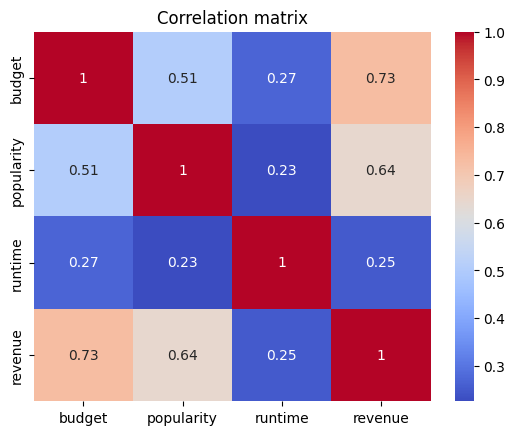

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['revenue'], bins=50)
plt.title("Revenue Distribution")
numeric_cols = ['budget','popularity','runtime','revenue']
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap='coolwarm')
plt.title("Correlation matrix")
df['release_date'] = pd.to_datetime(df['release_date'],errors='coerce')
df['release_month'] = df['release_date'].dt.month
df['release_year'] = df['release_date'].dt.year

In [10]:
import ast 
df['genres_list'] = df['genres'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)] if pd.notnull(x) else[])
df['genre_count'] = df['genres_list'].apply(lambda x: len(x))
def get_director(crew):
    try:
        crew = ast.literal_eval(crew)
        for person in crew:
            if person['job'] == 'Director':
                return person['name']
        return None
    except:
        return None

df['director'] = df['crew'].apply(get_director)
df.to_csv('../data/processed/cleaned_movies.csv', index=False)

